# Indian Used Car Price Prediction

The aim of this project to predict the price of the used cars in indian metro cities by analyzing the car's features such as company, model, variant, fuel type, quality score and many more.

### About the Dataset
The "Indian IT Cities Used Car Dataset 2023" is a comprehensive collection of data that offers valuable insights into the used car market across major metro cities in India. This dataset provides a wealth of information on a wide range of used car listings, encompassing details such as car models, variants, pricing, fuel types, dealer locations, warranty information, colors, kilometers driven, body styles, transmission types, ownership history, manufacture dates, model years, dealer names, CNG kit availability, and quality scores.

### Data Dictionary
| Column Name | Description |
| --- | --- |
|ID|Unique ID for each listing|
|Company|Name of the car manufacturer|
|Model|Name of the car model|
|Variant|Name of the car variant|
|Fuel Type|Fuel type of the car|
|Color|Color of the car|
|Killometer|Number of kilometers driven by the car|
|Body Style|Body style of the car|
|Transmission Type|Transmission type of the car|
|Manufacture Date|Manufacture date of the car|
|Model Year|Model year of the car|
|CngKit|Whether the car has a CNG kit or not|
|Price|Price of the car|
|Owner Type|Number of previous owners of the car|
|Dealer State|State in which the car is being sold|
|Dealer Name|Name of the dealer selling the car|
|City|City in which the car is being sold|
|Warranty|Warranty offered by the dealer|
|Quality Score|Quality score of the car|

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\2147861503.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Loading the dataset
df = pd.read_csv('usedCars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


## Data Preprocessing Part 1

In [3]:
#Shape of the dataset
df.shape

(1064, 19)

In [4]:
#colums in the dataset
df.columns

Index(['Id', 'Company', 'Model', 'Variant', 'FuelType', 'Colour', 'Kilometer',
       'BodyStyle', 'TransmissionType', 'ManufactureDate', 'ModelYear',
       'CngKit', 'Price', 'Owner', 'DealerState', 'DealerName', 'City',
       'Warranty', 'QualityScore'],
      dtype='object')

In [5]:
#dropping column ID, as it is a identifier and not required for analysis
df.drop('Id',axis=1,inplace=True)

In [6]:
#Column Data Types
df.dtypes

Company              object
Model                object
Variant              object
FuelType             object
Colour               object
Kilometer             int64
BodyStyle            object
TransmissionType     object
ManufactureDate      object
ModelYear             int64
CngKit               object
Price                object
Owner                object
DealerState          object
DealerName           object
City                 object
Warranty              int64
QualityScore        float64
dtype: object

Type casting Price column to float

In [7]:
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(convert_amount)

In [8]:
#Checking for null values percentage wise
df.isnull().sum()/df.shape[0]*100

Company              0.000000
Model                0.000000
Variant              0.000000
FuelType             0.093985
Colour               0.000000
Kilometer            0.000000
BodyStyle            0.000000
TransmissionType    67.105263
ManufactureDate      0.000000
ModelYear            0.000000
CngKit              97.932331
Price                0.000000
Owner                0.000000
DealerState          0.000000
DealerName           0.000000
City                 0.000000
Warranty             0.000000
QualityScore         0.000000
dtype: float64

Here in the dataset, three columns have missing values - FuelType, TransmissionType and CngKit. I will be removing the CngKit column becuase in majority of the cars don't run on CNG and the CNG cars can be easily identified from the FuelType column. So we will replace the null values with 'No' in CngKit column. In case of the TransmissionType, 67% data is missing, so we can't include this column in our analysis. In case of the FuelType, we will drop the rows with null values.

In [9]:
df.drop('CngKit', axis=1, inplace=True)

In [10]:
#Dropping TransmissionType column
df.drop('TransmissionType',axis=1,inplace=True)

In [11]:
#Removing null values from FuelType column
df['FuelType'].dropna(inplace=True)

Dropping ManufacturerDate column as it the age of the car and we already have the ModelYear column

In [12]:
df.drop('ManufactureDate', axis = 1, inplace=True)

In [13]:
df.drop('Variant', axis = 1, inplace=True)

Changing the model year column to car age column

In [14]:
df['ModelYear'] = 2023 - df['ModelYear']
df.rename(columns={'ModelYear':'Age'},inplace=True)

In [15]:
for i in df.columns:
    print(i,df[i].nunique())

Company 23
Model 218
FuelType 5
Colour 76
Kilometer 1006
BodyStyle 10
Age 17
Price 362
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


Descriptive Statistics

In [16]:
df.describe()

,Kilometer,Age,Price,Warranty,QualityScore
count,1064.000000,1064.000000,1.064000e+03,1064.000000,1064.000000
mean,52807.187970,6.135338,8.350536e+05,0.738722,7.770207
std,33840.296979,2.996786,5.726538e+05,0.439538,0.719717
min,101.000000,0.000000,9.500000e+04,0.000000,0.000000
25%,32113.500000,4.000000,4.850000e+05,0.000000,7.500000
50%,49432.000000,6.000000,6.750000e+05,1.000000,7.800000
75%,68828.500000,8.000000,9.850000e+05,1.000000,8.100000
max,640000.000000,20.000000,8.500000e+06,1.000000,9.400000


In [17]:
df.head()

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,Age,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),PETROL,Silver,33197,HATCHBACK,5,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,PETROL,Red,10322,HATCHBACK,2,435000.0,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,PETROL,Grey,37889,HATCHBACK,8,470000.0,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,PETROL,A Blue,13106,HATCHBACK,3,990000.0,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,DIESEL,Silver,104614,HATCHBACK,13,270000.0,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the distribution of data across all the columns, in order to understand the data in a better way. After that I will be looking at the relationship between the target variable and the independent variables.

### Car Company

C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\2929482969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'Set1').set_title('Number of cars by company')


Text(0.5, 1.0, 'Number of cars by company')

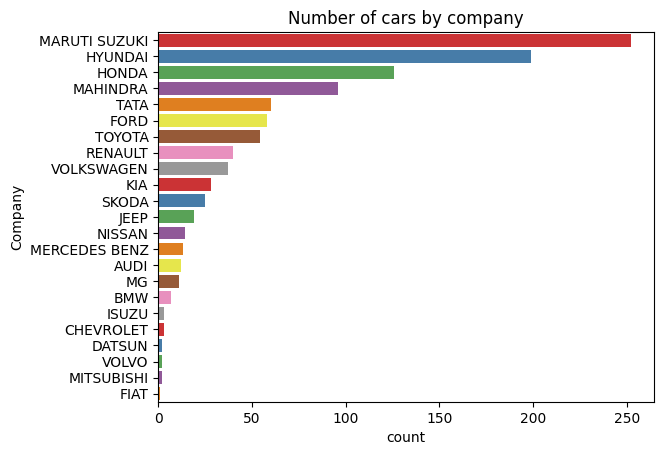

In [22]:
#Number of cars by company
sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'Set1').set_title('Number of cars by company')

From this graph, we get know about the distribution of cars in the dataset from different companies.There are total 23 companies in the dataset, out which Maruti Suzuki, Hyundai, Honda, Mahindra and Tata are the top five companies who used cars are for sale. Therefore, we can assume that these company's car are more durable and have a good resale value.

### Top 10 Car Models

C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\3123474212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'Set1').set_title('Top 10 Car Models')


Text(0.5, 1.0, 'Top 10 Car Models')

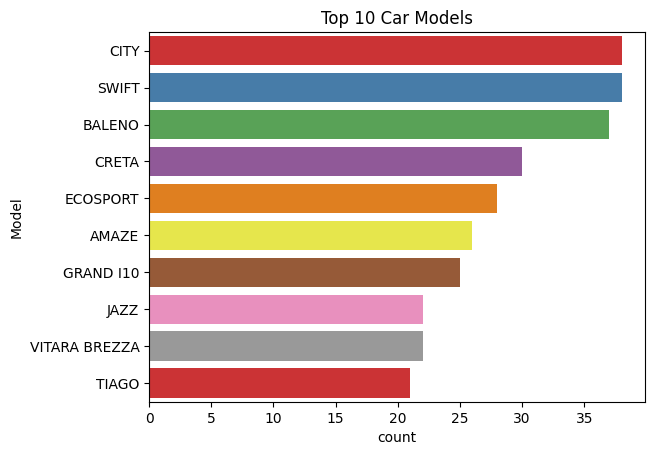

In [23]:
#Top 10 cars models by number
sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'Set1').set_title('Top 10 Car Models')

Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we can assume that these car models are more durable and have a good resale value. Moreover, this graph also shows that Honda City and Swift are more in demand in the used car market.

### Car Fuel Type

C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\183303738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')


Text(0.5, 1.0, 'Number of cars by Fuel Type')

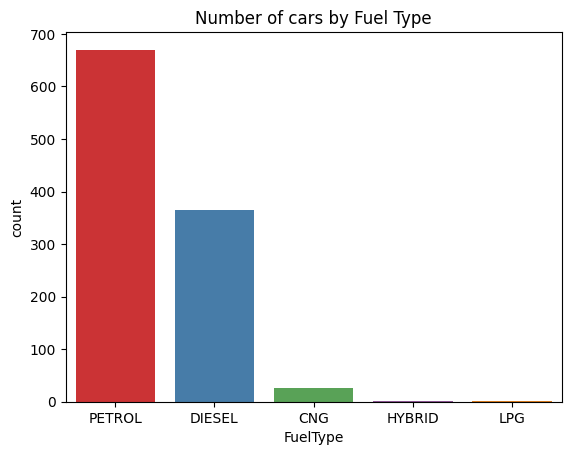

In [24]:
#Cars count by fuel type
sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')

Majority of cars for resale have a petrol engine which is more than 650 cars, followed by 350 cars with diesel engine. Very few of the cars have CNG engine and negligible number of cars are hybrid or on LPG. Thereofore, we can assume that petrol and diesel cars are more in demand in the used car market.

### Top 10 Colors for Cars

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Silver'),
  Text(2, 0, 'Grey'),
  Text(3, 0, 'Red'),
  Text(4, 0, 'Black'),
  Text(5, 0, 'Brown'),
  Text(6, 0, 'Blue'),
  Text(7, 0, 'A Blue'),
  Text(8, 0, 'Pearl White'),
  Text(9, 0, 'Orange')])

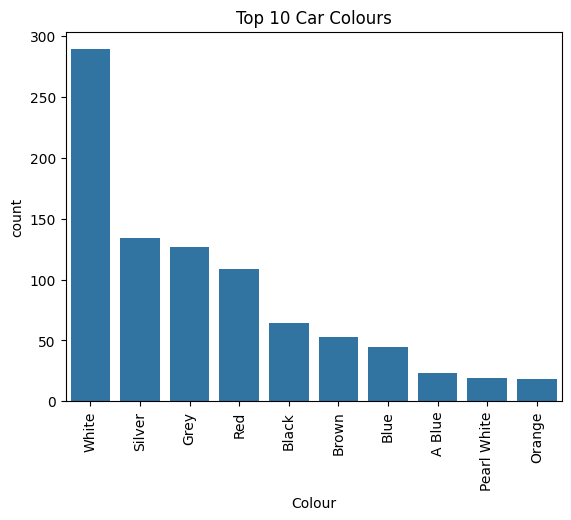

In [25]:
#Top 10 colors of cars
sns.countplot(x = 'Colour', data = df, order = df['Colour'].value_counts().iloc[:10].index).set_title('Top 10 Car Colours')
plt.xticks(rotation = 90)

Although color of car has no impact on the cars performance, but still it plays a major role in the car demand. From the graph, we can see that white color is the most preferred color for the used cars, followed by silver, grey, red and black. Therefore, we can assume that white, silver, grey, red and black color cars are more in demand in the used car market will have a good resale value.

### Odometre Reading

Text(0.5, 1.0, 'Odometer Reading')

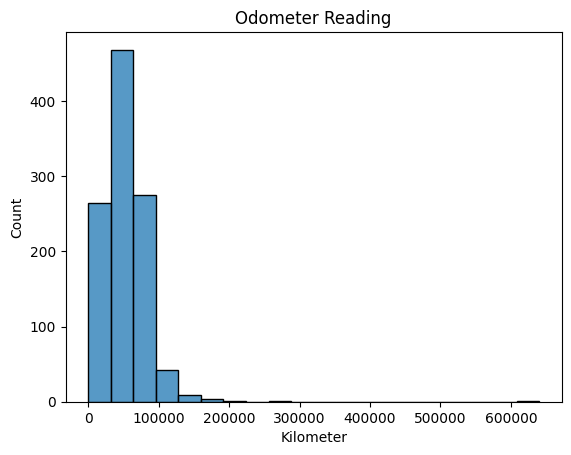

In [26]:
#Odometer reading distribution
sns.histplot(x = 'Kilometer', data = df, bins = 20).set_title('Odometer Reading')

This graph shows the distribution of the odometer readings of the cars in the dataset. From the graph, we can see that most of the cars have odometer reading less than 100000 km. To be more particular majority of cars are driven for 30000 km to 50000 km. Thefore, we can assume that cars with odometer reading less than 100000 km are more in demand in the used car market will have a good resale value.

### Body Style

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

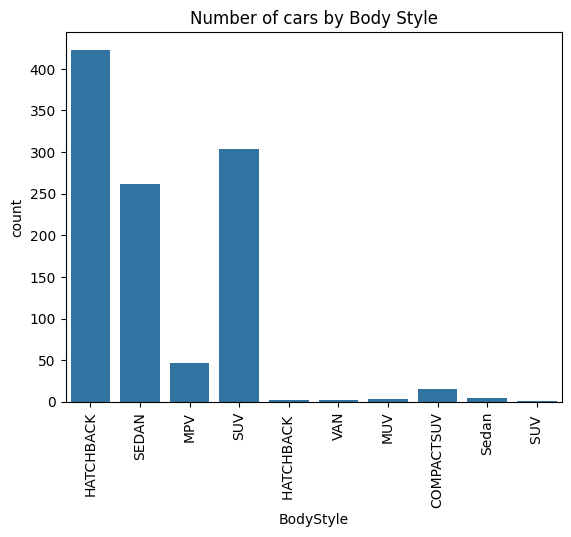

In [27]:
#Body style count
sns.countplot(x = 'BodyStyle', data = df).set_title('Number of cars by Body Style')
plt.xticks(rotation = 90)

According to this graph, most of the cars have HatchBack, SUV and Sedan body style, which tells us about the market demand of these body styles. Therefore, we can assume that cars with HatchBack, SUV and Sedan body style are more in demand in the used car market will have a good resale value.

### Car Age Distribution

Text(0.5, 1.0, 'Car age distribution')

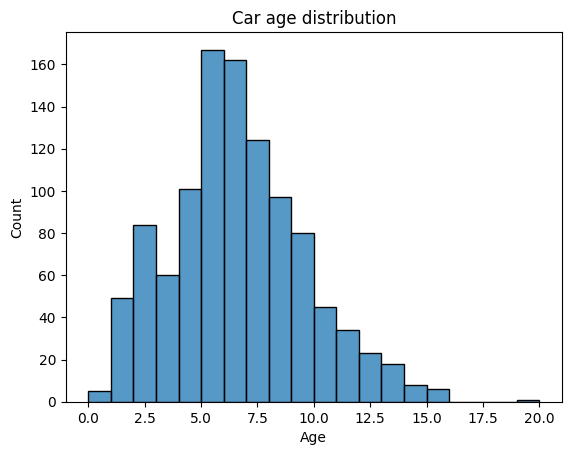

In [28]:
#Car age distribution
sns.histplot(x = 'Age', data = df, bins = 20).set_title('Car age distribution')

Age of the car plays an important role in deciding its resale value. Here, in the dataset cars that age between 5 to 7 years are more in number. Moreover majority of the cars age more than 5 years, which affect their resale value. However, there are still significant number of cars with age less than 5 years, thereofore, I assume they would have higher resale value.

In addition to that, we can see than one car has age near 20 years which could be an outlier.

### Price Distribution

Text(0.5, 1.0, 'Car price distribution')

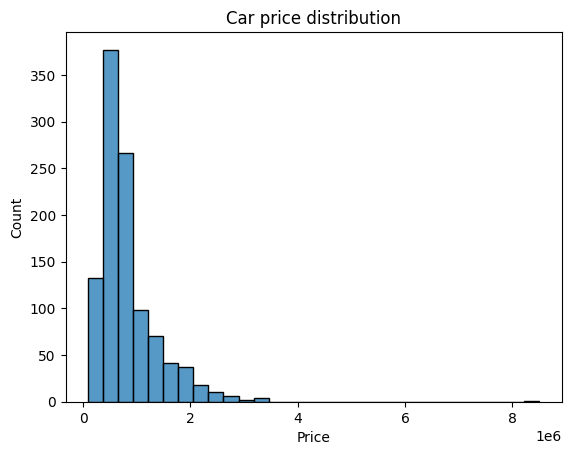

In [29]:
#Price distribution
sns.histplot(x = 'Price', data =df, bins = 30).set_title('Car price distribution')

This graph help us to know about the distribution of the car prices in the dataset. In the dataset, most of the cars have price is between 3 to 9 lakhs, with maximum cars between 3 to 6 lakhs. Therefore, we can assume that cars with price between 3 to 9 lakhs are more in demand in the used car market. Moreover there are some cars with resale price more than 20 lakhs, which could be possible for luxury cars or it could be an outlier.

### Location based Distribution

C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\196354263.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\196354263.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\196354263.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'Car Estate'),
 Text(7, 0, 'OM Motors'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

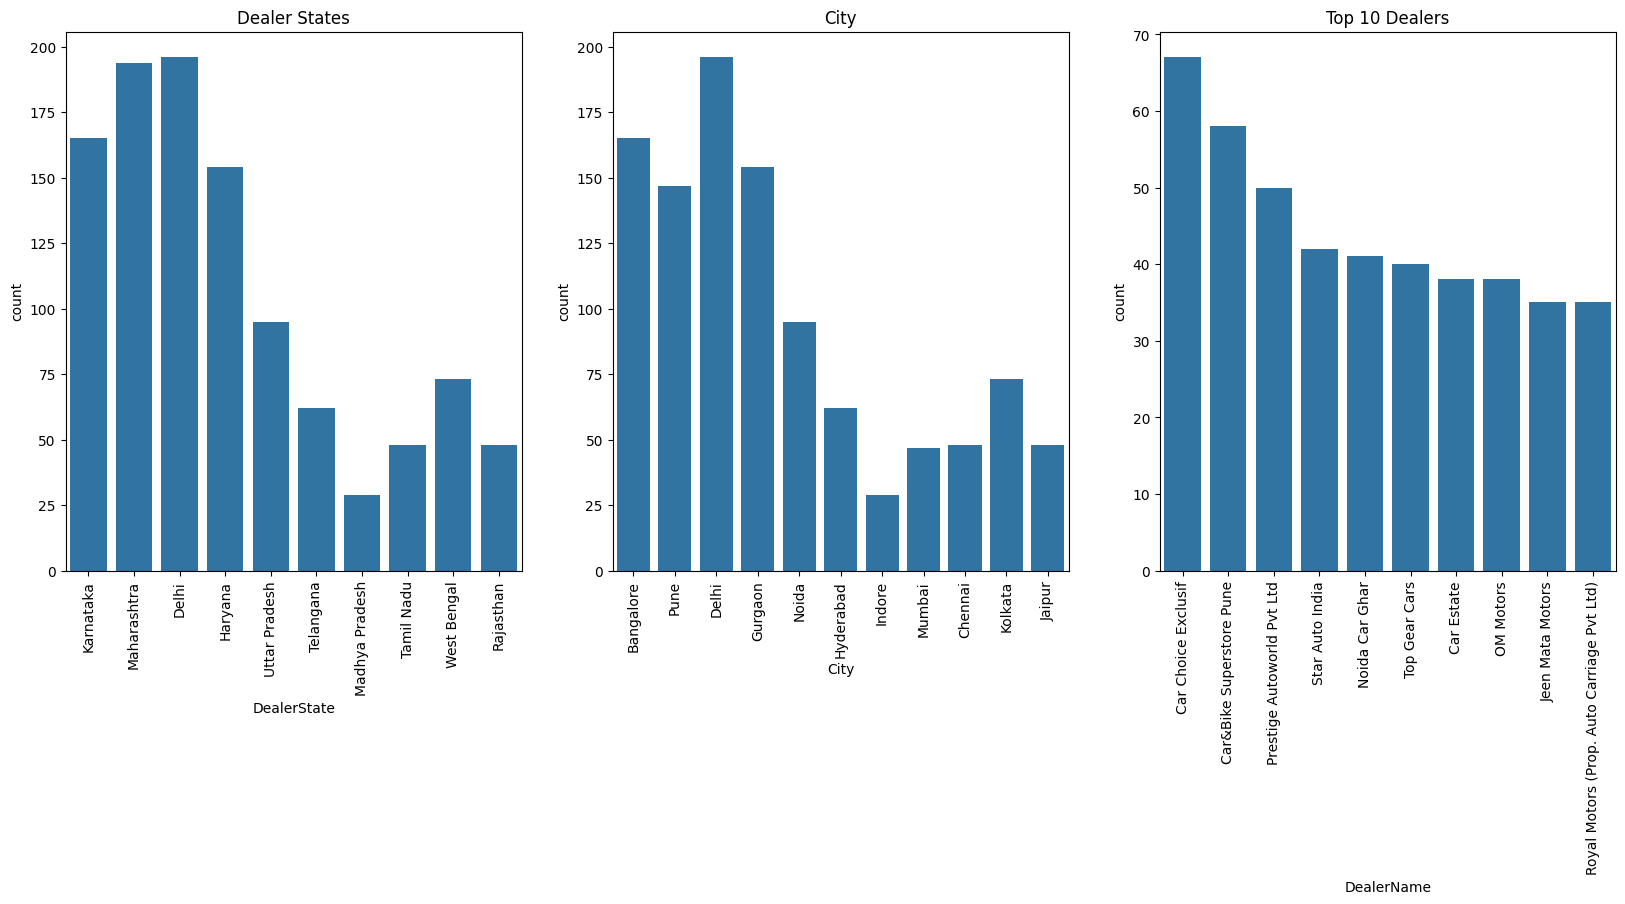

In [30]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.countplot(x = 'DealerState', data = df, ax = ax[0]).set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.countplot(x = 'City', data = df, ax = ax[1]).set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.countplot(x = 'DealerName', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2]).set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

These graphs shows the distribution of cars based on their dealer state, city and Dealer Name. In the dealer state graph, we see that Delhi and Maharashtra have the highest number of used cars for sale followed by Karnataka and Haryana. In the dealer city graph, we see that Delhi has the highest number of cars which is obvious from the the previous graph, however in contrast to the previous graph, Banglore has more used cars for sale than Pune, infact Pune has lower car count than Gurgaon. In the dealer name graph, we see that Car Choice Exclusif, Car&Bike Superstore Pune and Prestige Autoworld Pvt Ltd are moung the top 3 dealers with highest number of used cars for sale.

### Car Owner Type

Text(0.5, 1.0, 'Number of cars by Owner Type')

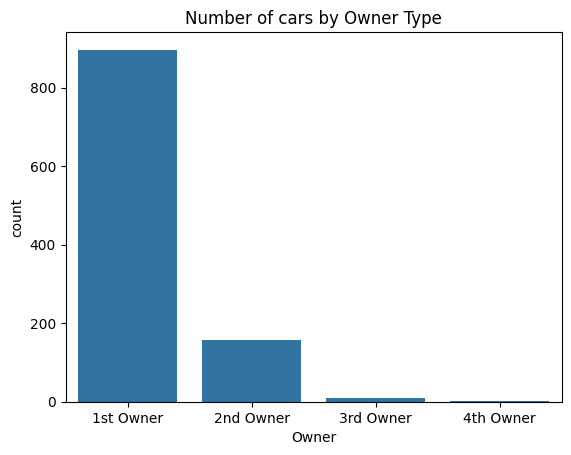

In [31]:
sns.countplot(x = 'Owner', data = df).set_title('Number of cars by Owner Type')

The car owner type has a huge impact on its resale value. Majority of the cars that are been sold are 1at Owner cars followed by 2nd Owner cars which are significantly less in number as compared to 1st Owner. Moreover, the 3rd and 4th owner cars are very less in number. Therefore, we can assume that 1st Owner cars are more preferred in the used car market and have a good resale value.

### Warranty

Text(0.5, 1.0, 'Number of cars by Warranty')

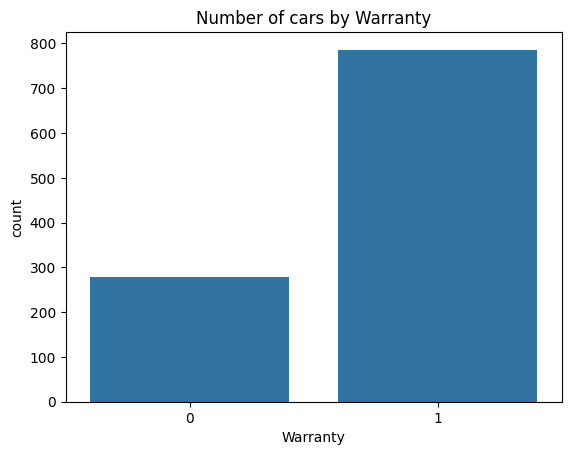

In [32]:
sns.countplot(x = 'Warranty', data = df).set_title('Number of cars by Warranty')

This graphs shows the number of used cars for sale that come with a warranty from the dealership company. The warranty plays a major role and customers prefer to purchase a car with warranty, it has been shown in the dataset as well, where we can see than the number cars with warranty is almost twice the number of cars without warranty.

### Quality Score Distribution

Text(0.5, 1.0, 'Quality Score Distribution')

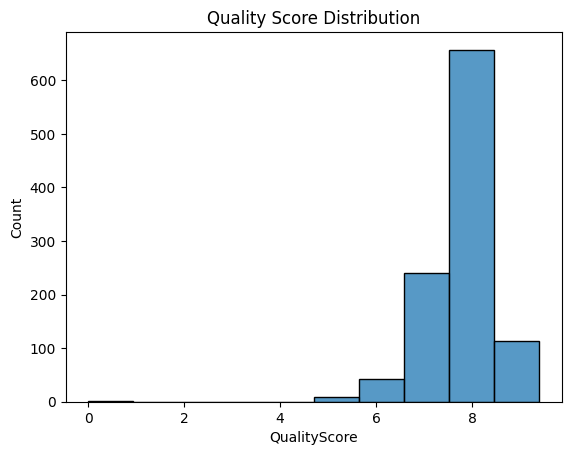

In [33]:
sns.histplot(x = 'QualityScore', data = df, bins = 10).set_title('Quality Score Distribution')

Quality score is an important feature which has a huge impact on the car sales and its preference by the customers. Cars with higher quality scores tend to have a much higher resale value and are more preferred by the customers. In the dataset, most of the cars have a decent quality score between 7-8, which highlights that the cars are thoroughly checked before being sold in the used car market. However, there are some cars with quality score less than 5, which could be due to the fact that they are not in good condition or they are very old.

##### Till now, I have visualized the distribution of the data and got a better understanding of the data. Now, I will be looking at the relationship between the Car Price aans the independent variables.

### Top 10 Car Companies by Price

Text(0.5, 1.0, 'Top 10 car Companies by price')

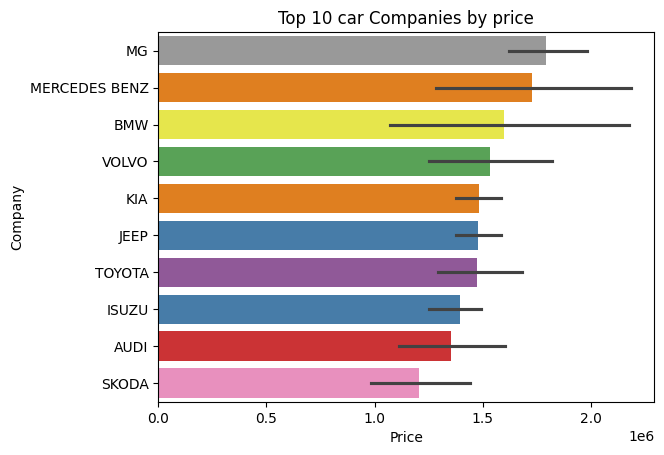

In [34]:
#Top 10 car companies by price
sns.barplot(y = 'Company', x = 'Price', data = df, order = df.groupby('Company')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Company', palette= 'Set1').set_title('Top 10 car Companies by price')

This graphs highlights the top 10 car companies in the dataset with the highest resale value. The MG, Mercedes Benz and BMW are the top 3 car companies with the highest resale value, since these are luxury car companies. The list also includes Volvo. followed by KIA, Jeep and Toyota. Surprisingly Audi has much lower resale price has compared to the other luxury car companies which might be due to other features. 

Moreover, my prevous hypothesis, about the car companies -Maruti Suzuki, Hyundai, Honda, Mahindra and Tata, was wrong as they are not in the top 10 list. This means that these companies cars are in greater number due to their demand because of low price

### Top 10 Car Models by Price

Text(0.5, 1.0, 'Top 10 car Models by price')

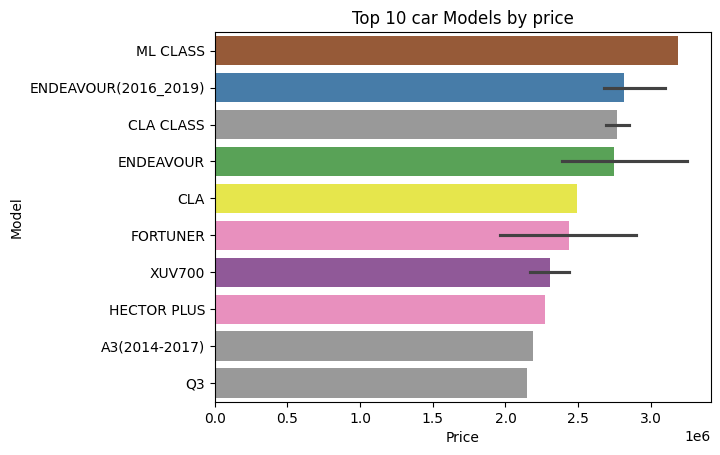

In [35]:
#Top 10 car models by price
sns.barplot(y = 'Model', x = 'Price', data = df, order = df.groupby('Model')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Model', palette= 'Set1').set_title('Top 10 car Models by price')

This graph shows the relation between the car model and it resale value and we can see that it shows similarity woth the previous graph. The car models - ML Class, Endeavour(2016_2019), CLA class are the top three models with highest resale value, followed by CLA, Fortuner and XUV700. Like the previous graph, the audi model A3 is at the 9th position with a much lower resale value as compared to the other models.

In the car model also my hypothesis was wrong as I assummed that Honda City and Swift are the top two car models in the dataset, followed by Baleno, Creata and EcoSport. Therefore, we came to know that these car in higher number due to their high demnad because of low price.

### Car Fuel Type and Price

Text(0.5, 1.0, 'Price by Fuel Type')

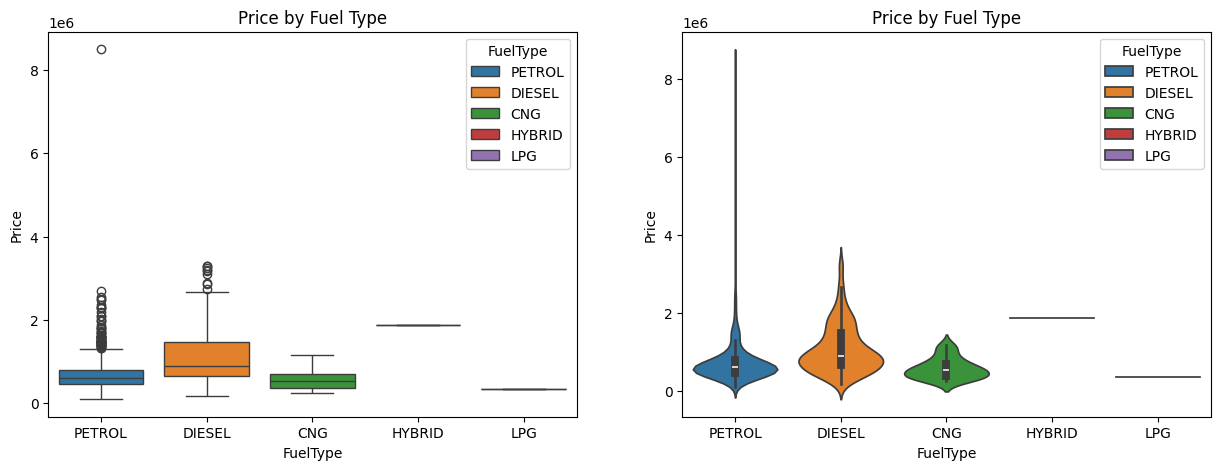

In [36]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'FuelType', y = 'Price', data = df, ax = ax[0], hue = 'FuelType').set_title('Price by Fuel Type')
sns.violinplot(x = 'FuelType', y = 'Price', data = df, ax = ax[1], hue = 'FuelType').set_title('Price by Fuel Type')

The above plots visualizes the relationship between the car fuel type and its resale value. In the boxplot we can see than cars with diesel fuel type have higher resale value than petrol and CNG and LPG. In the violin plot, we can see that the distribution of the price for diesel cars is more concentrated between 10 to 20 lakh as compared to Petrol. From this it is cleared that, customers prefer petrol and diesel car than other fuel type and the diesel cars are more in demand in the used car market.

### Top 10 Car Colors by Price

Text(0.5, 1.0, 'Top 10 car Colors by price')

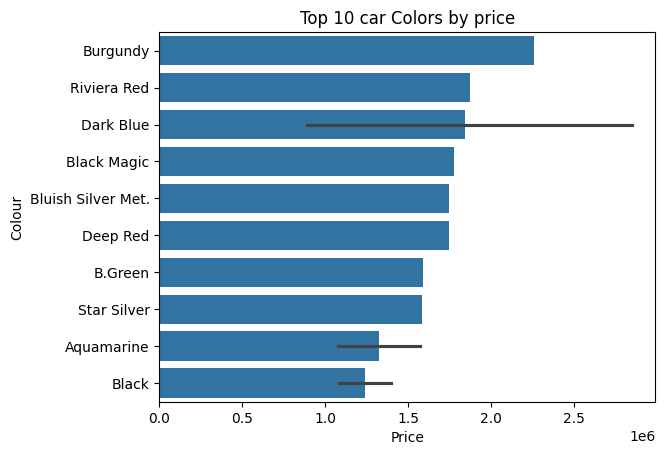

In [37]:
#Top 10 car colors by price
sns.barplot(y = 'Colour', x = 'Price', data = df, order = df.groupby('Colour')['Price'].mean().sort_values(ascending=False).iloc[:10].index).set_title('Top 10 car Colors by price')

The cars with colors like Burgundy, Riviera Red and Dark Blue have higher resale value as compared to other colors. This shows that color of the car does matter and plays a major role in the resale value of the car.

Moreover, we also came to know that exotic colors have more price but they are not in demand in the used car market.

### Odometer Reading and Price

Text(0.5, 1.0, 'Odometer Reading and Price')

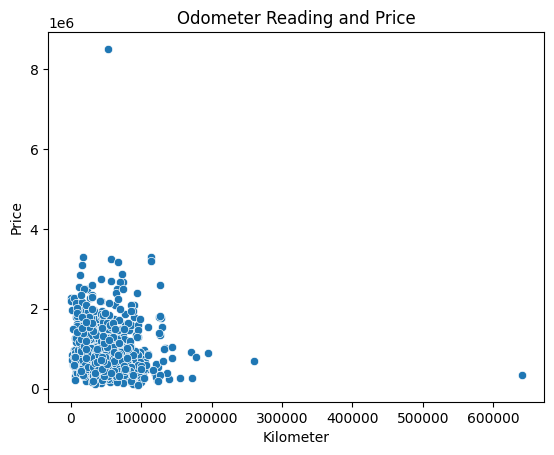

In [38]:
sns.scatterplot(x = 'Kilometer', y = 'Price', data = df).set_title('Odometer Reading and Price')

In the scatter plot we can see than the data is concentrated near the origin, which means that most of the cars have odometer reading less than 100000 km. In addition to that the cars with less odometer reading shows higher resale value and as the odometer reading increases the resale value decreases. Therefore, my hypothesis was correct that cars with odometer reading less than 100000 km are more in demand in the used car market will have a good resale value.

### Body Style and Price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

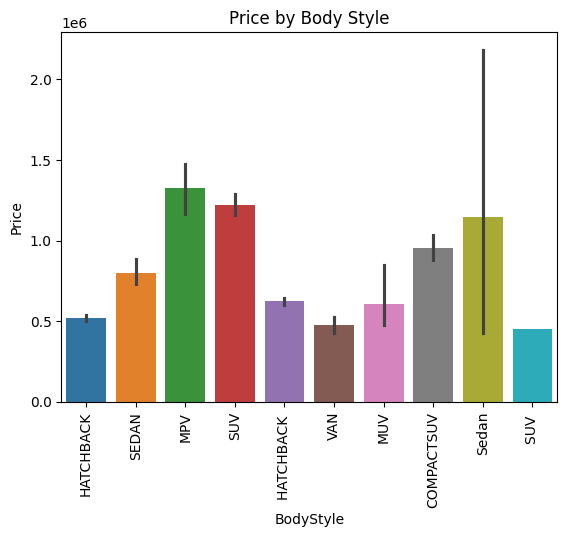

In [39]:
sns.barplot(x = 'BodyStyle', y = 'Price', data = df, hue = 'BodyStyle').set_title('Price by Body Style')
plt.xticks(rotation = 90)

MPV, SUV and Sedan are the top 3 car body styles with the highest resale value. Therefore, we can assume that these body styles are more preferred in the used car market and have a good resale value. This also shows that my assumption was correct however, the Hatchback body style cars despite being in majority have lower resale value.

### Car Age and Price

Text(0.5, 1.0, 'Car age and Price')

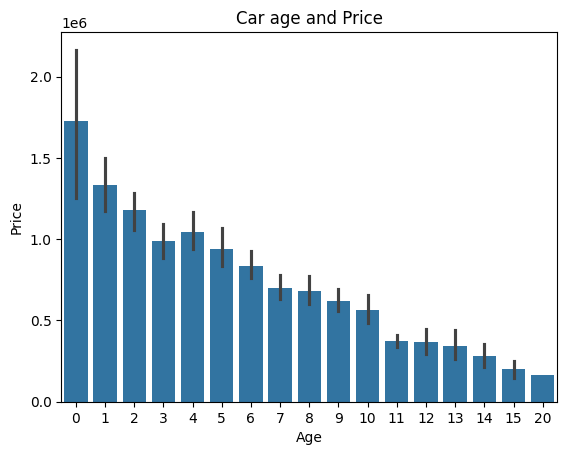

In [40]:
sns.barplot(x = 'Age', y = 'Price', data = df).set_title('Car age and Price')

As we discussed earlier, age is a key determinant for a car's resale value and this graph clearly visulaizes the relation of the age with car price. The cars with age less than a year has then highest price and as the age increases the prices decreases gradually. Therefore, my hypothesis was correct that cars with age less than 5 years have higher resale value.

### Location based Price Distribution

C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\7821321.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\7821321.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\7821321.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)


[Text(0, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(1, 0, 'Car Choice Exclusif'),
 Text(2, 0, 'Top Gear Cars'),
 Text(3, 0, 'Sri Vaishnavi Cars'),
 Text(4, 0, 'Car&Bike Superstore Pune'),
 Text(5, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)'),
 Text(6, 0, 'Jeen Mata Motors'),
 Text(7, 0, 'Noida Car Ghar'),
 Text(8, 0, 'Noida Car Point ll'),
 Text(9, 0, 'ACE MOTORS')]

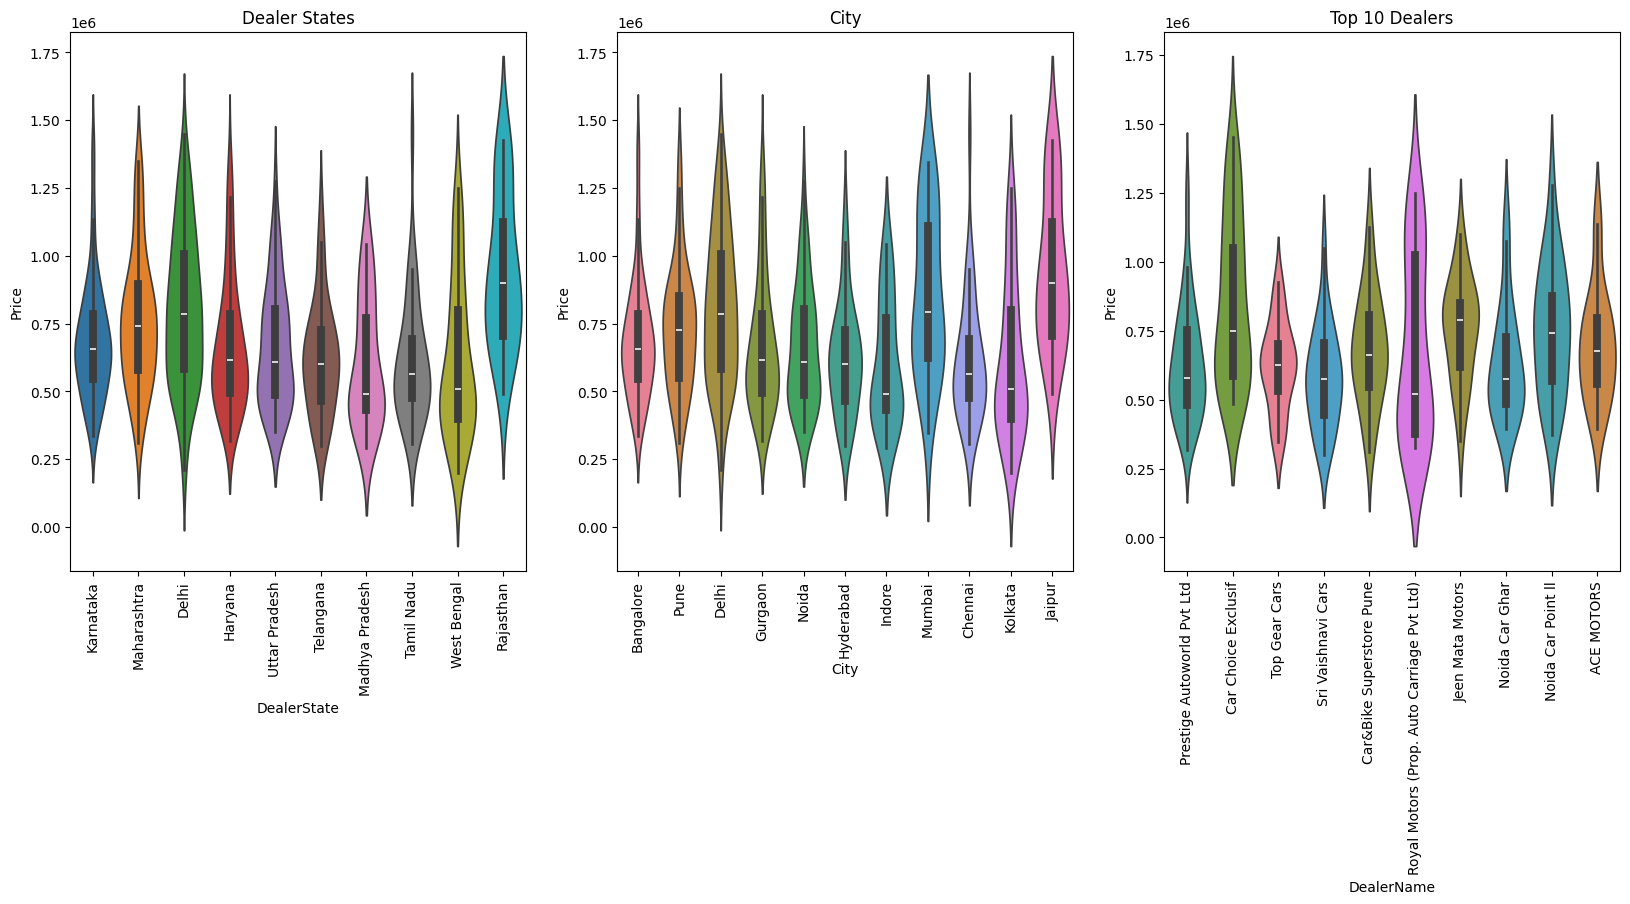

In [52]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

#Dealer State
sns.violinplot(x = 'DealerState', y = 'Price', data = df, ax = ax[0], hue = 'DealerState').set_title('Dealer States')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

#City
sns.violinplot(x = 'City',y = 'Price', data = df, ax = ax[1], hue = 'City').set_title('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

#top 10 dealers
sns.violinplot(x = 'DealerName',y = 'Price', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2], hue = 'DealerName').set_title('Top 10 Dealers')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

In the above graph we can see the price distribution based on the state, city and the dealer name. In the state graph, we can see that the cars in Rajastan have the highest price followed by Delhi. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Haryana. In the city graph, we can see that the cars in Jaipur have the highest price followed by Mumbai and Delhi. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Gurgaon. In the dealer name graph, we can see the top 10 dealers along with their price distribution. Here, Car Estate has the highest price followed by Star Auto India and Car Choice. Moreover, there are some outliers in the graph which os visible from the violinplot where there is strong peak incase of Noida Car Ghar.

### Car Owner Type and Price

Text(0.5, 1.0, 'Price by Owner Type')

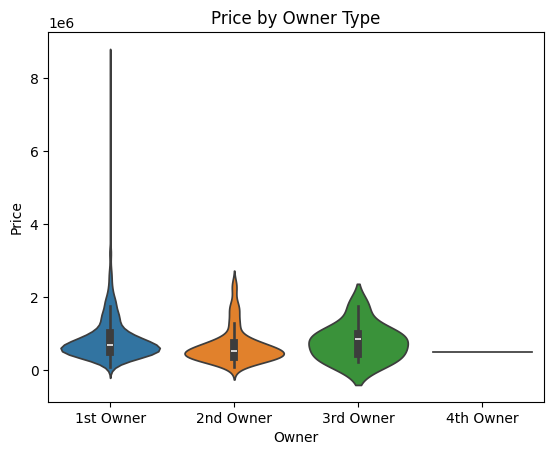

In [42]:
sns.violinplot(x = 'Owner', y = 'Price', data = df, hue = 'Owner').set_title('Price by Owner Type')

The graph shows the price distribution with respect to the car owner type. The cars with 1st owner have the highest price which is obvious as they are new cars. However, the 3rd Owner type cars depite being less in number have higher price than 2nd Owner type cars, which is not obvious. Therefore, we can assume that 3rd Owner type cars having higher price could some luxury or vintage cars.

### Warranty and Price

Text(0.5, 1.0, 'Price by Warranty')

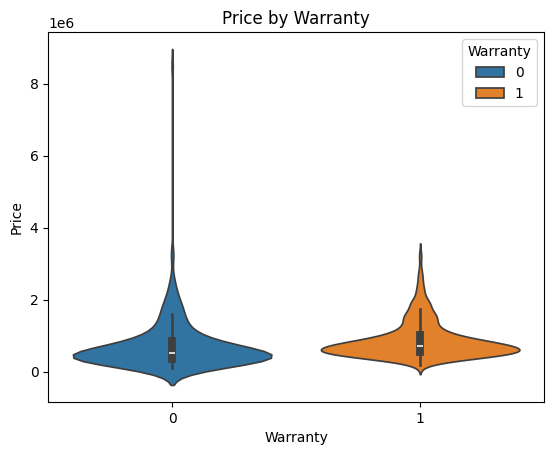

In [43]:
sns.violinplot(x = 'Warranty', y = 'Price', data = df, hue = 'Warranty').set_title('Price by Warranty')

Here, we can see some change in the violinplot of the cars with and without warranty. The cars with warranty tends to have slightly higher price than the cars without warranty. Therefore, we can assume that cars with warranty are more preferred in the used car market and have a good resale value.

### Quality Score and Price

Text(0.5, 1.0, 'Quality Score and Price')

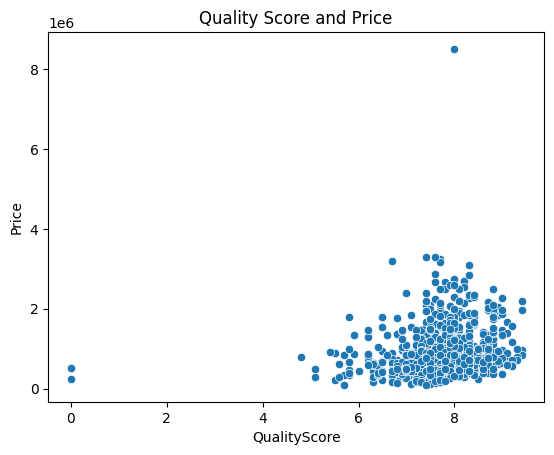

In [44]:
sns.scatterplot(x = 'QualityScore', y = 'Price', data = df).set_title('Quality Score and Price')

We can see a very high concentration near the quality score 7 and above having much higher price than the cars with quality score less than 7. Therefore, we can assume that cars with quality score 7 and above are more preferred in the used car market and have a good resale value.

## Data Preprocessing Part 2

Dropping column car model beacause, it has too many unique values and it will increase the dimensionality of the dataset.

In [45]:
df.drop('Model', axis = 1, inplace = True)

### Label Encoding

In [42]:
#columns for label encoding
cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
#Label encoding object
le = LabelEncoder()

#label encoding for object type columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Company [12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]
FuelType [4 1 0 2 5 3]
Colour [61 56 34  0  9 11 66 47 49 38 14 71 72 30 74 52 39 28 60  7 54 62 40 13
 20 70 63 12 24 23 35 26 29 15 31  1 68  4  8 73 22 44 57 65 42 50 32 64
 19 43 46 33 16 27 53 25 10 69 51 17  6 48 59 58  5  3 18 45 67 36 21 55
  2 37 75 41]
BodyStyle [1 5 3 6 2 9 4 0 8 7]
Owner [0 1 2 3]
DealerState [2 4 0 1 8 7 3 6 9 5]
DealerName [52 38  4  1 56 29  0 34 47 51 11 21  9 10 43 33  7 16  5 12 42 17 27 50
 45  6 20 36 23 41 32 31 18  2 48 15 54 40 55 13 49 25 35 46 24 14 44 19
 39 28 26  3 53 30  8 22 37]
City [ 0 10  2  3  9  4  5  8  1  7  6]


### Outlier Removal

In [ ]:
#Using IQRS to remove outliers

#columns for outlier removal
cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

#Removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Correlation Matrix Heatmap

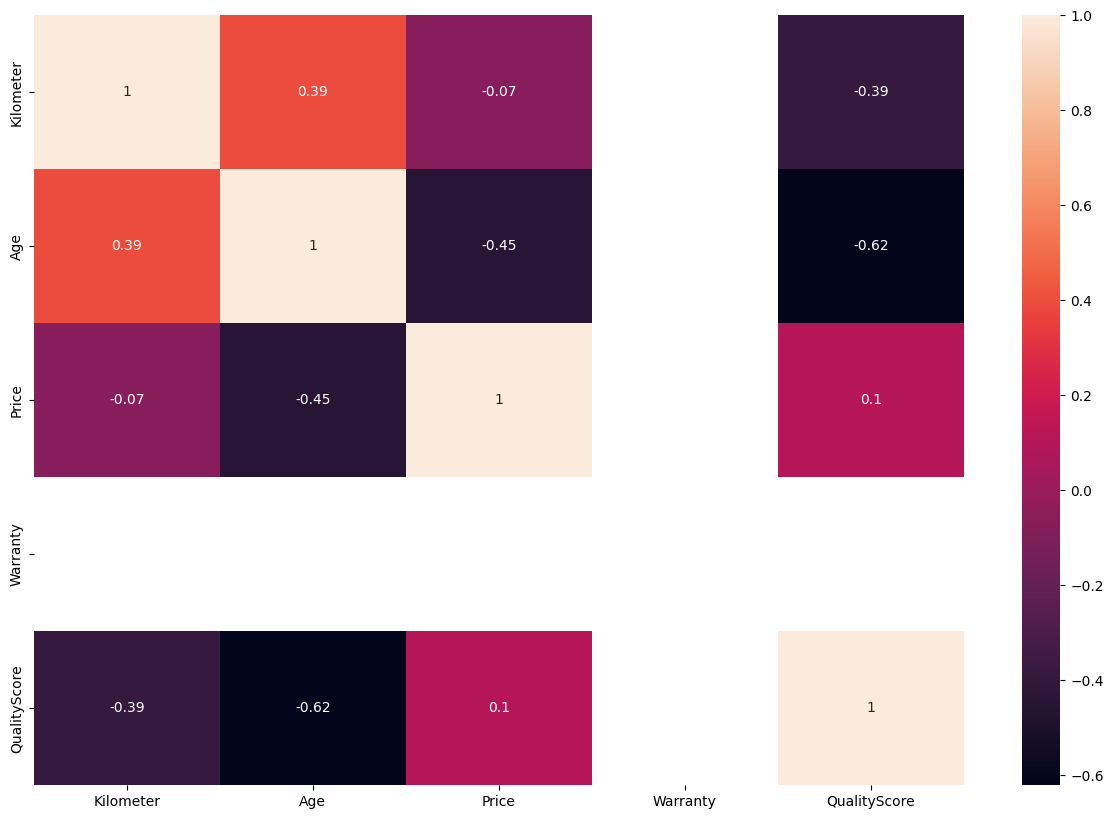

In [80]:
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

## Train Test Split

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

## Model Building

I will be using the following regression models:
- Decision Tree Regressor
- Random Forest Regressor
- Ridge Regressor

### Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
#Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

#### Hyperparameter Tuning

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# One-Hot Encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Define parameters for grid search, including a range for random_state
para = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'random_state': [42]
}

# Create a Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Create a Grid Search Object
grid = GridSearchCV(estimator=dtr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

# Fit the model with encoded features
grid.fit(X_train_encoded, y_train)

# Print the best parameters, ensuring random_state shows 42
print(grid.best_params_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


In [121]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# One-hot encode the categorical variables in X_train
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Initialize Random Forest Regressor with the best parameters
dtr = RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0)

# Fit the model with the encoded data
dtr.fit(X_train_encoded, y_train)

# Print the training score
print(dtr.score(X_train_encoded, y_train))


0.8509460013187398


In [122]:
# Prediction
X_test_encoded = pd.get_dummies(X_test, drop_first=True)  # One-hot encode X_test
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)  # Align columns
dtr_pred = rfr.predict(X_test_encoded)  # Make predictions


### Random Forest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor Object
rfr = RandomForestRegressor()

#### Hyperparameter Tuning

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# One-Hot Encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Define parameters for grid search, including a range for random_state
para = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'random_state': [0,42]
}

# Create a Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Create a Grid Search Object
grid = GridSearchCV(estimator=dtr, param_grid=para, cv=5, n_jobs=-1, verbose=2)

# Fit the model with encoded features
grid.fit(X_train_encoded, y_train)

# Print the best parameters, ensuring random_state shows 42
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


In [86]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# One-hot encode the categorical variables in X_train
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Initialize Random Forest Regressor with the best parameters
rfr = RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0)

# Fit the model with the encoded data
rfr.fit(X_train_encoded, y_train)

# Print the training score
print(rfr.score(X_train_encoded, y_train))


0.8509460013187398


In [88]:
# Prediction
X_test_encoded = pd.get_dummies(X_test, drop_first=True)  # One-hot encode X_test
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)  # Align columns
rfr_pred = rfr.predict(X_test_encoded)  # Make predictions


## Model Evaluation

### Distribution Plot

C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\60301046.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = y_test, ax = ax[0], color = 'r', hist = False, label = 'Actual').set_title('Decision Tree Regressor')
C:\Users\vashi\AppData\Local\Temp\ipykernel_4756\60301046.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

<Axes: title={'center': 'Random Forest Regressor'}, ylabel='Density'>

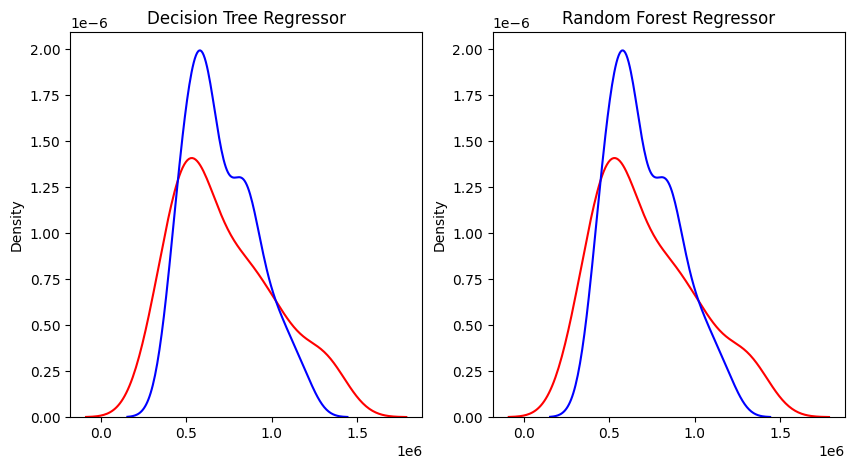

In [123]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

#decision tree regressor
sns.distplot(x = y_test, ax = ax[0], color = 'r', hist = False, label = 'Actual').set_title('Decision Tree Regressor')
sns.distplot(x = dtr_pred, ax = ax[0], color = 'b', hist = False, label = 'Predicted')

#random forest regressor
sns.distplot(x = y_test, ax = ax[1], color = 'r', hist = False, label = 'Actual').set_title('Random Forest Regressor')
sns.distplot(x = rfr_pred, ax = ax[1], color = 'b', hist = False, label = 'Predicted')

### Model Metrics

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Decision Tree Regressor
print('Decision Tree Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, dtr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, dtr_pred))
print('R2 Score : ', r2_score(y_test, dtr_pred))

#Random Forest Regressor
print('Random Forest Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, rfr_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, rfr_pred))
print('R2 Score : ', r2_score(y_test, rfr_pred))

Decision Tree Regressor
Mean Squared Error :  30050011739.496162
Mean Absolute Error :  132120.29365755265
R2 Score :  0.65446134465715
Random Forest Regressor
Mean Squared Error :  30050011739.496162
Mean Absolute Error :  132120.29365755265
R2 Score :  0.65446134465715


## Feature Importance

## Conclusion

From the exploratory data analysis, I have revealed two major facts about the used car market: which are demand and price. The demand of low price used car is pretty high as compared to the to expensive ones, which highlights the customers attraction towards budget cars. But upon studying the graph I also came to know about some interesting facts about the used car market. Begining with the car companies, companies like- MG, Mercedes Benz, BMW, Volvo and KIA have the highest price but Maruti Suzuki, Hyundai, Honda, Mahindra and Tata car are in higher demand. This highlights that customer prefer to buy new luxury cars instead of used ones.

Majority of the cars run either on petro or diesel, with diesel cars having slightly higher price. I als came to know that car is major player in the market. Cars like white, grey, silver and black are in higher demand but exotic colors like burgundy, riviera red, dark blue, black majic have higher price. Coming to the car's odometer reading, most of the cars have reading less than 10,000 km, and cars with lower odometer reading have the higher price.

Cars with bodystyle like HatchBack, SUV and Sedan are most preferred by the customers whereas the bodystyle like MPV, SUV and Sedan are the top most ecpensive ones. Age of the car also play a major role in its resale value. As the car age increases, it resale value decreases. Therefore, cars than age less than 5 years have higher price and prefered more. Car price aslo changes by location. Delhi, Maharashtra and Rajstan are the top three states with the highes price and Car Estate, Star Auto India and Car Choice are the top three dealers with the highest price.

Customers usually prefer the car with 1st owner type resulting in hugher demand as well as higher price. Cars that comes with a warranty provudes an assurance to the customer, resulting in a little bit higher price. The last feature i.e. Quality score also dictates the car price, where cars with higher quality score have higher price.

Coming to the machine learning models, I have used Descision tree regressor and random forest regressor to predict the car price. The random forest regressor model performed better than the decision tree regressor model. Moreover, from the feature importance graph, we can see that the car age, bodystyle and comapny are the key features that affect the car price.